### 学习目标

- 目标: 无
- 应用: 电影数据的分析练习

### 内容预览

#### 1. 获取电影数据中评分的平均分和导演的人数等信息

想知道这些电影数据中评分的平均分,导演的人数等信息,我们应该怎么获取?

#### 2. 对于这一组电影数据,如果我们想看 Rating,Runtime(Minutes)的分布情况,应该如何呈现数据?

对于这一组电影数据,如果我们想看 Rating,Runtime(Minutes)的分布情况,应该如何呈现数据?

#### 3. 对于这一组电影数据,如果我们希望统计电影分类(genre)的情况,应该如何处理数据?

对于这一组电影数据,如果我们希望统计电影分类(genre)的情况,应该如何处理数据?


现在我们有一组从 2006 年到 2016 年 1000 部最流行的电影数据,数据来源:https://www.kaggle.com/damianpanek/sunday-eda/data

- 问题 1:我们想知道这些电影数据中评分的平均分,导演的人数等信息,我们应该怎么获取?
- 问题 2:对于这一组电影数据,如果我们想 rating,runtime 的分布情况,应该如何呈现数据?
- 问题 3:对于这一组电影数据,如果我们希望统计电影分类(genre)的情况,应该如何处理数据?


In [2]:
# 1.准备数据
import pandas as pd
movie = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [4]:
# 问题 1:我们想知道这些电影数据中评分的平均分,导演的人数等信息,我们应该怎么获取?

# 评分的平均分
movie['Rating'].mean()


6.723199999999999

In [5]:
# 导演的人数
len(movie['Director'].unique())

644

<Axes: ylabel='Frequency'>

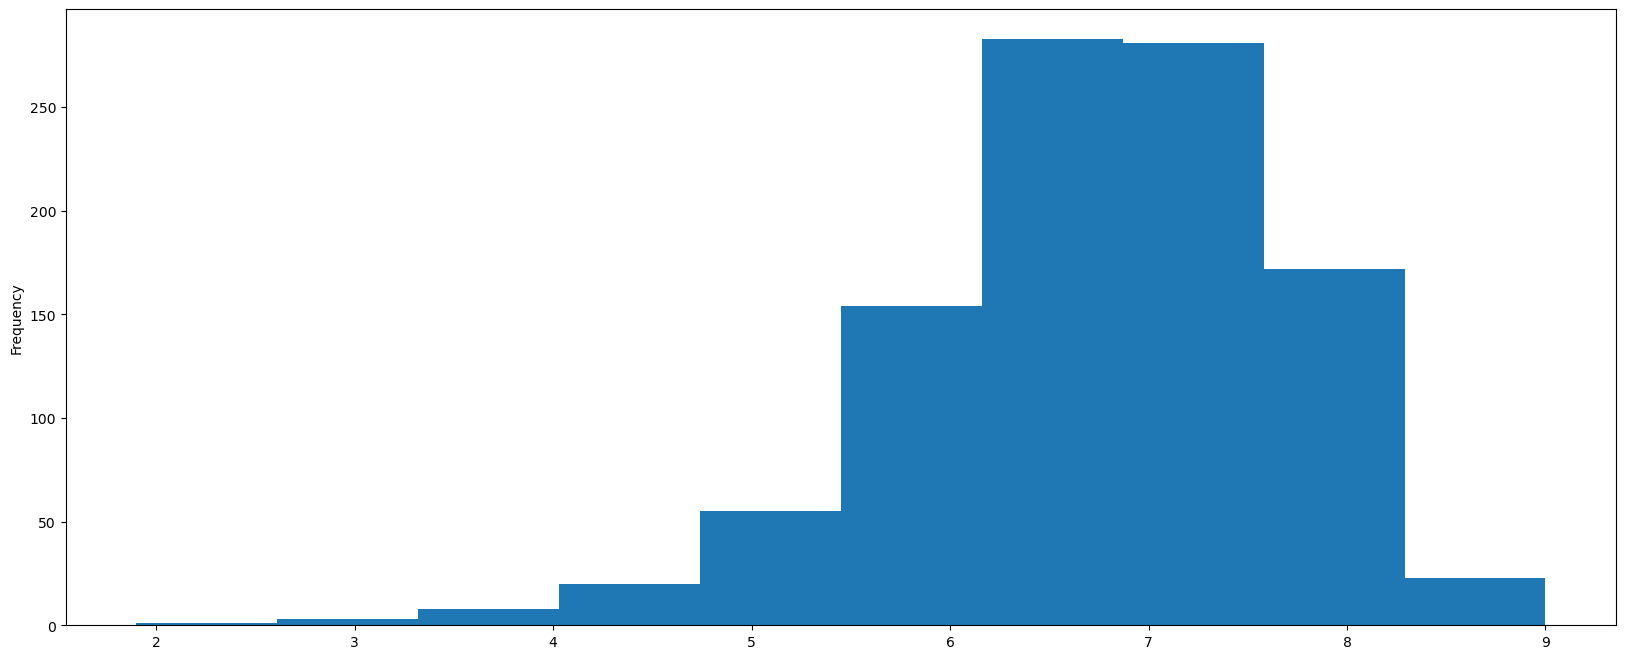

In [7]:
# 问题 2:对于这一组电影数据,如果我们想Rating,Runtime的分布情况,应该如何呈现数据?

# Rating的分布情况
movie['Rating'].plot(kind='hist',figsize=(20,8))


<Axes: ylabel='Frequency'>

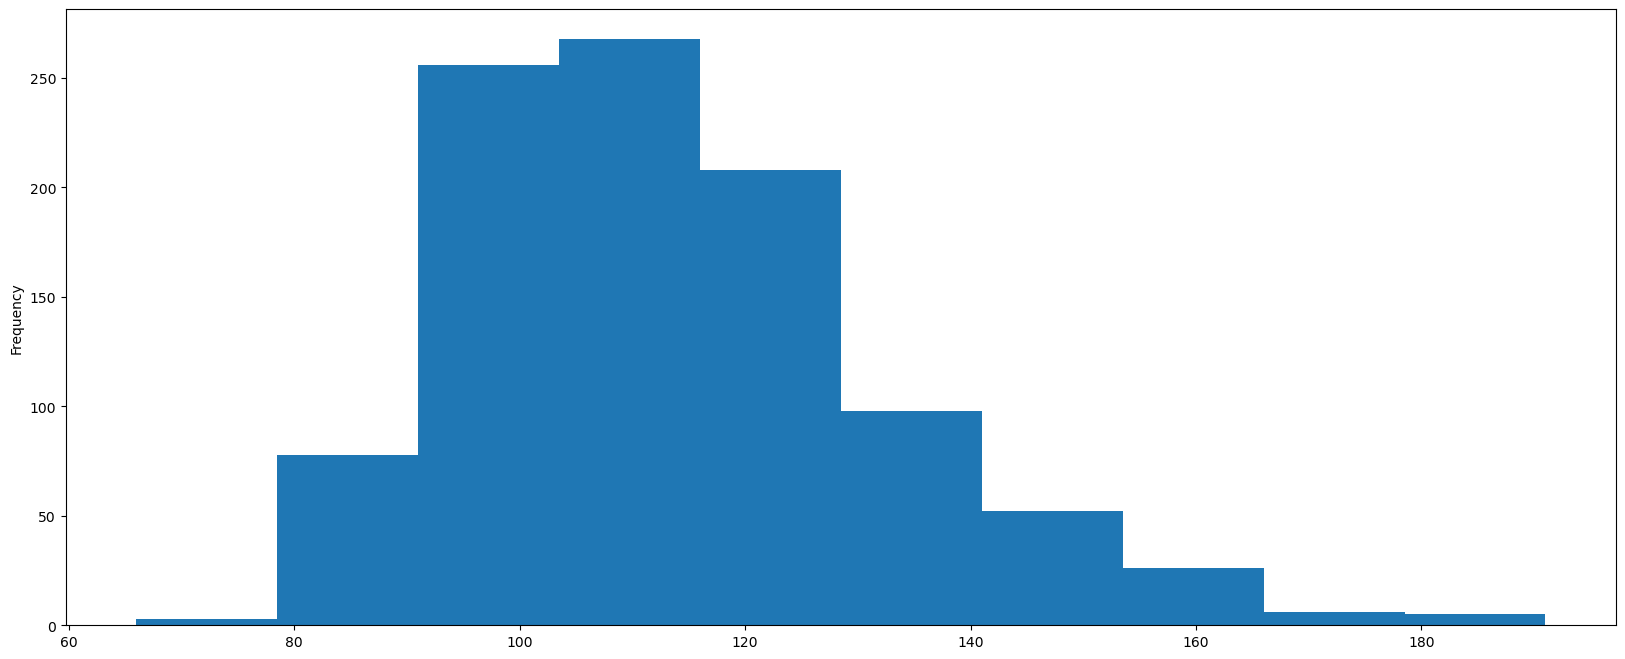

In [8]:
# Runtime的分布情况
movie['Runtime (Minutes)'].plot(kind='hist',figsize=(20,8))

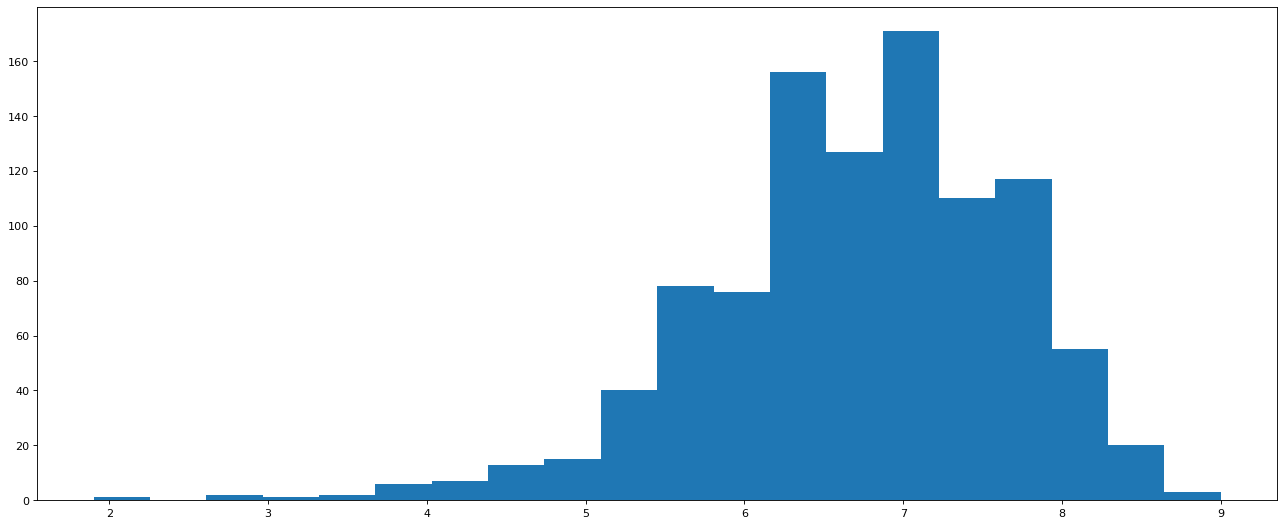

In [13]:
import matplotlib.pyplot as plt
# 创建画布
plt.figure(figsize=(20,8),dpi=80)

# 绘制直方图
plt.hist(movie['Rating'].values,bins=20)

# 显示图像
plt.show()

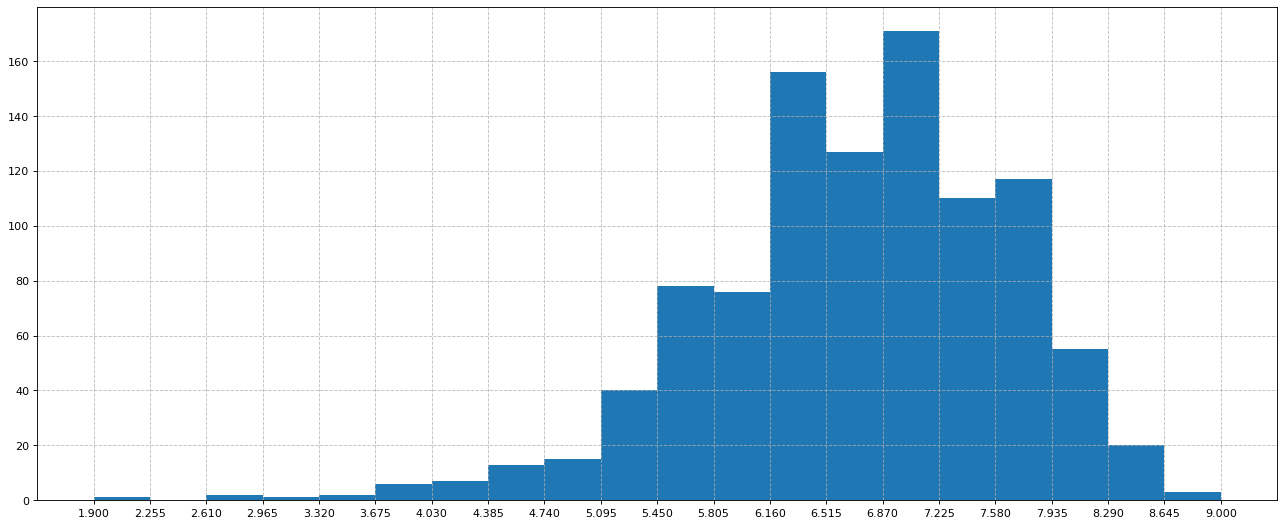

In [22]:
# 创建画布
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,8),dpi=80)

# 绘制直方图
plt.hist(movie['Rating'].values,20)

# 修改间隔
plt.xticks(np.linspace(movie['Rating'].min(),movie['Rating'].max(),21))
plt.grid(linestyle="--",alpha=0.8)
# 显示图像
plt.show()

<Axes: >

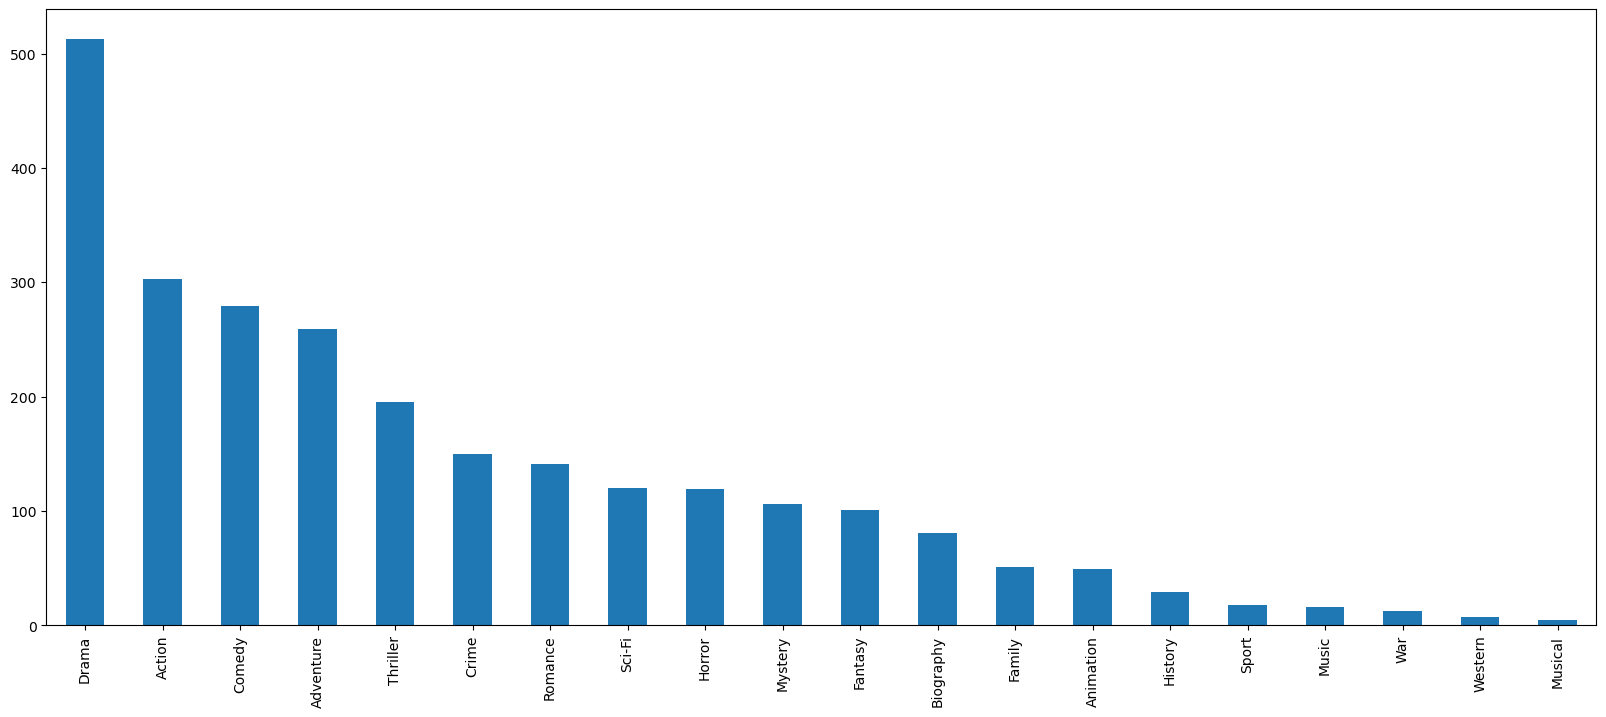

In [25]:
# 问题 3:对于这一组电影数据,如果我们希望统计电影分类(genre)的情况,应该如何处理数据?

# 统计分类的情况
# 绘制成柱状图,降序
movie['Genre'].str.split(',').apply(lambda x:pd.Series(x)).stack().value_counts().plot(kind='bar',figsize=(20,8))